# Продвинутое решение задачи 1 отборочного этапа

Краткое описание задачи: Есть набор данных о месторождении и местодобычи нефти, необходимо определить тип месторождения.

Соревнование по задаче на kaggle:

https://www.kaggle.com/c/profitrain1/overview

In [ ]:
from google.colab import files
uploaded = files.upload()

In [1]:
import pandas as pd

train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")
train.head()

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,COMPRESSION,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250.000000,PALEOGENE,SANDSTONE,8000.000000,575.000000,5.000000,0.100000
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,RIFT/SALT,16360.000000,JURASSIC,SANDSTONE,980.000000,490.000000,16.000000,10.000000
2,COMPRESSION/EROSION,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,4700.000000,PERMIAN,DOLOMITE,65.000000,21.000000,8.000000,0.500000
3,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,OFFSHORE,OIL,DEVELOPING,FORELAND/RIFT/SALT,8105.345849,CRETACEOUS,SANDSTONE,116.037254,41.595776,14.984042,29.920211
4,COMPRESSION/EROSION,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,7600.000000,CRETACEOUS,SANDSTONE,158.000000,15.000000,9.500000,10.000000


# Исследование данных

1. Какая размерность данных?
2. Что есть признаки? Что есть целевая переменная?
3. Какие типы данных представлены в наборе?
4. Есть ли пропуски в данных?
5. Сколько классов и какое у них соотношение?
6. Есть ли категориальные признаки?

In [2]:
# размерность данных
train.shape

(355, 12)

In [3]:
train['Onshore/Offshore'].value_counts() #целевая переменная

ONSHORE             177
OFFSHORE            173
ONSHORE-OFFSHORE      5
Name: Onshore/Offshore, dtype: int64

Посмотрев на целевую переменную, можем сделать следующие выводы:
- у нас три класса
- классы  несбалансировали

In [4]:
train.isna().sum() # проверим есть ли пропуски в данных

Tectonic regime       0
Onshore/Offshore      0
Hydrocarbon type      0
Reservoir status      0
Structural setting    0
Depth                 0
Period                0
Lithology             0
Gross                 0
Netpay                0
Porosity              0
Permeability          0
dtype: int64

In [5]:
train.head(2)

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,COMPRESSION,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250.0,PALEOGENE,SANDSTONE,8000.0,575.0,5.0,0.1
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,RIFT/SALT,16360.0,JURASSIC,SANDSTONE,980.0,490.0,16.0,10.0


In [6]:
train.dtypes

Tectonic regime        object
Onshore/Offshore       object
Hydrocarbon type       object
Reservoir status       object
Structural setting     object
Depth                 float64
Period                 object
Lithology              object
Gross                 float64
Netpay                float64
Porosity              float64
Permeability          float64
dtype: object

**Категориальные признаки:**
- Tectonic regime
- Onshore/Offshore
- Hydrocarbon type
- Reservoir status
- Structural setting
- Period
- Lithology

Остальные признаки относятся к числовым.
Целевая переменная также является категориальной.

# Подготовка данных

## Тренировочный набор данных

**Обработаем категориальные признаки:**
Tectonic regime, Onshore/Offshore, Hydrocarbon type, Reservoir status, Structural setting, Period, Lithology - категориальные переменные!!

Есть разные методы как это можно сделать:
- LabelEncoder()
- Get_dummies()
- OneHotVector()



In [7]:
train['Tectonic regime']
# в одной строчке несколько режимов, которые разделены /

0                                            COMPRESSION
1              COMPRESSION/EVAPORITE/EXTENSION/INVERSION
2                                    COMPRESSION/EROSION
3      COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION
4                                    COMPRESSION/EROSION
                             ...                        
350                                  COMPRESSION/EROSION
351                                  COMPRESSION/EROSION
352                 STRIKE-SLIP/TRANSPRESSION/BASEMENT-I
353                 STRIKE-SLIP/TRANSPRESSION/BASEMENT-I
354                      INVERSION/COMPRESSION/EXTENSION
Name: Tectonic regime, Length: 355, dtype: object

In [8]:
train_full = train.copy() # создадим копию датафрейма

# воспользуемся методом get_dummies(), который очень умный и может работать с множнственными категориями
# (для этого мы указываем разделитель /)
train_full = train_full['Tectonic regime'].str.get_dummies('/')
train_full.head()

,BASEMENT-I,COMPRESSION,DIAPIR,EROSION,EVAPORITE,EXTENSION,GRAVITY,INVERSION,LINKED,REACTIVATION,SHALE,STRIKE-SLIP,SYNSEDIMENTATION,TRANSPRESSION,TRANSTENSION,UPLIFT
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# добавим к каждому названию префик regime_, что далее понимать откуда эти столбцы взялись
train_full = train_full.add_prefix('regime_').reset_index()

# удалим лишний столец и соединим полученное кодирование категориальной переменной
# со всем набором данных
train_full.drop(['index'], axis=1, inplace=True)
train_full = pd.concat([train, train_full], axis=1)
train_full.head()

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,...,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT
0,COMPRESSION,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250.000000,PALEOGENE,SANDSTONE,8000.000000,575.000000,...,0,0,0,0,0,0,0,0,0,0
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,RIFT/SALT,16360.000000,JURASSIC,SANDSTONE,980.000000,490.000000,...,0,1,0,0,0,0,0,0,0,0
2,COMPRESSION/EROSION,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,4700.000000,PERMIAN,DOLOMITE,65.000000,21.000000,...,0,0,0,0,0,0,0,0,0,0
3,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,OFFSHORE,OIL,DEVELOPING,FORELAND/RIFT/SALT,8105.345849,CRETACEOUS,SANDSTONE,116.037254,41.595776,...,1,1,0,0,0,0,0,0,0,0
4,COMPRESSION/EROSION,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,7600.000000,CRETACEOUS,SANDSTONE,158.000000,15.000000,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# анологично сделаем для множественного категориального признака - Structural setting
# с помощью дополнительного датафрейма
tmp = train_full.copy()
tmp = tmp['Structural setting'].str.get_dummies('/')

tmp = tmp.add_prefix('Structural setting_').reset_index()
tmp.drop(['index'], axis=1, inplace=True)
train_full = pd.concat([train_full, tmp], axis=1)
train_full

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,...,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH
0,COMPRESSION,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250.000000,PALEOGENE,SANDSTONE,8000.000000,575.000000,...,1,0,0,0,0,0,0,0,0,0
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,GAS-CONDENSATE,PLATEAU PRODUCTION,RIFT/SALT,16360.000000,JURASSIC,SANDSTONE,980.000000,490.000000,...,0,0,0,0,1,1,0,0,0,0
2,COMPRESSION/EROSION,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,4700.000000,PERMIAN,DOLOMITE,65.000000,21.000000,...,1,0,0,0,0,0,0,0,0,0
3,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,OFFSHORE,OIL,DEVELOPING,FORELAND/RIFT/SALT,8105.345849,CRETACEOUS,SANDSTONE,116.037254,41.595776,...,1,0,0,0,1,1,0,0,0,0
4,COMPRESSION/EROSION,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,7600.000000,CRETACEOUS,SANDSTONE,158.000000,15.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,COMPRESSION/EROSION,ONSHORE-OFFSHORE,OIL,MATURE PRODUCTION,WRENCH/FORELAND,1400.000000,NEOGENE,SANDSTONE,500.000000,120.000000,...,1,0,0,0,0,0,0,0,0,1
351,COMPRESSION/EROSION,ONSHORE-OFFSHORE,OIL,NEARLY DEPLETED,FORELAND,6550.000000,CRETACEOUS,DOLOMITE,1300.000000,200.000000,...,1,0,0,0,0,0,0,0,0,0
352,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,ONSHORE-OFFSHORE,OIL,NEARLY DEPLETED,WRENCH,2326.000000,NEOGENE,THINLY-BEDDED SANDSTONE,700.000000,375.000000,...,0,0,0,0,0,0,0,0,0,1
353,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,ONSHORE-OFFSHORE,OIL,NEARLY DEPLETED,WRENCH,1726.000000,NEOGENE,THINLY-BEDDED SANDSTONE,660.000000,152.000000,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# закодируем остальные категориальные признаки 
train_full = pd.get_dummies(train_full, columns=['Hydrocarbon type', 'Reservoir status', 'Period', 'Lithology'])
train_full.head()

,Tectonic regime,Onshore/Offshore,Structural setting,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,...,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,COMPRESSION,ONSHORE,FORELAND,15250.000000,8000.000000,575.000000,5.000000,0.100000,0,1,...,0,0,0,0,0,0,1,0,0,0
1,COMPRESSION/EVAPORITE/EXTENSION/INVERSION,OFFSHORE,RIFT/SALT,16360.000000,980.000000,490.000000,16.000000,10.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,COMPRESSION/EROSION,ONSHORE,FORELAND,4700.000000,65.000000,21.000000,8.000000,0.500000,0,1,...,0,0,1,0,0,0,0,0,0,0
3,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,OFFSHORE,FORELAND/RIFT/SALT,8105.345849,116.037254,41.595776,14.984042,29.920211,0,1,...,0,0,0,0,0,0,1,0,0,0
4,COMPRESSION/EROSION,ONSHORE,FORELAND,7600.000000,158.000000,15.000000,9.500000,10.000000,0,1,...,0,0,0,0,0,0,1,0,0,0


In [12]:
# удалим ненужные столбцы после обработки
train_full.drop(['Tectonic regime', 'Structural setting'], axis=1, inplace=True)
train_full.head()

,Onshore/Offshore,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,...,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,ONSHORE,15250.000000,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,OFFSHORE,16360.000000,980.000000,490.000000,16.000000,10.000000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,ONSHORE,4700.000000,65.000000,21.000000,8.000000,0.500000,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,OFFSHORE,8105.345849,116.037254,41.595776,14.984042,29.920211,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,ONSHORE,7600.000000,158.000000,15.000000,9.500000,10.000000,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
train_full

,Onshore/Offshore,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,...,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,ONSHORE,15250.000000,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,OFFSHORE,16360.000000,980.000000,490.000000,16.000000,10.000000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,ONSHORE,4700.000000,65.000000,21.000000,8.000000,0.500000,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,OFFSHORE,8105.345849,116.037254,41.595776,14.984042,29.920211,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,ONSHORE,7600.000000,158.000000,15.000000,9.500000,10.000000,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,ONSHORE-OFFSHORE,1400.000000,500.000000,120.000000,35.000000,1200.000000,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
351,ONSHORE-OFFSHORE,6550.000000,1300.000000,200.000000,11.000000,10.000000,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
352,ONSHORE-OFFSHORE,2326.000000,700.000000,375.000000,28.000000,400.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
353,ONSHORE-OFFSHORE,1726.000000,660.000000,152.000000,34.000000,2300.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# Закодируем целевую переменную
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train_full['Onshore/Offshore'] = labelencoder.fit_transform(train_full['Onshore/Offshore'])
train_full

,Onshore/Offshore,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,...,Lithology_CONGLOMERATE,Lithology_DIATOMITE,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE
0,1,15250.000000,8000.000000,575.000000,5.000000,0.100000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,16360.000000,980.000000,490.000000,16.000000,10.000000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,4700.000000,65.000000,21.000000,8.000000,0.500000,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,8105.345849,116.037254,41.595776,14.984042,29.920211,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,7600.000000,158.000000,15.000000,9.500000,10.000000,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2,1400.000000,500.000000,120.000000,35.000000,1200.000000,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
351,2,6550.000000,1300.000000,200.000000,11.000000,10.000000,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
352,2,2326.000000,700.000000,375.000000,28.000000,400.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
353,2,1726.000000,660.000000,152.000000,34.000000,2300.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# размерность данных и признакового пространства ДО обработки данных
train.shape

(355, 12)

In [16]:
# размерность данных и признакового пространства ПОСЛЕ обработки данных
train_full.shape

(355, 87)

Как видим после обработки количество признаков изменилось с **12** до **87**.

## Подготовка тестовых данных

Теперь обработаем анологичным образом тестовые данные:
- закодируем категориальные признаки
- выделим общее пространство признаков

In [17]:
import pandas as pd

test = pd.read_csv("test_final.csv")

test.head(2)

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,COMPRESSION/EVAPORITE/EXTENSION/GRAVITY/INVERSION,GAS,DECLINING PRODUCTION,INVERSION/SUB-SALT,7420.0,PERMIAN,SANDSTONE,715.0,580.0,11.0,0.5
1,EXTENSION,OIL,NEARLY DEPLETED,PASSIVE,4843.0,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0


In [18]:
test.shape

(278, 11)

In [19]:
train.shape

(355, 12)

In [20]:
test_full = test.copy() 
test_full = test_full['Tectonic regime'].str.get_dummies('/')

test_full = test_full.add_prefix('regime_').reset_index()

test_full.drop(['index'], axis=1, inplace=True)
test_full = pd.concat([test, test_full], axis=1)

tmp = test_full.copy()
tmp = tmp['Structural setting'].str.get_dummies('/')

tmp = tmp.add_prefix('Structural setting_').reset_index()
tmp.drop(['index'], axis=1, inplace=True)
test_full = pd.concat([test_full, tmp], axis=1)

test_full = pd.get_dummies(test_full, columns=['Hydrocarbon type', 'Reservoir status', 'Period', 'Lithology'])

test_full.drop(['Tectonic regime', 'Structural setting'], axis=1, inplace=True)

test_full.head(2)

,Depth,Gross,Netpay,Porosity,Permeability,regime_BASEMENT-I,regime_COMPRESSION,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,...,Lithology_CHALK,Lithology_CHALKY LIMESTONE,Lithology_CONGLOMERATE,Lithology_DOLOMITE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALY SANDSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
0,7420.0,715.0,580.0,11.0,0.5,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,4843.0,2133.0,72.0,23.0,350.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
test_full.shape

(278, 68)

In [22]:
train_full.shape

# это не обсуждали!

(355, 87)

После того как мы обработали наши тестовые и тренировочные данные, мы можем заметить что у нас получилось разное признаковое пространство.

Так как в тренировочном наборе данных оказались признаки, которых нет в тестовом и наоборот.

Поэтому для корректного решения задачи, нужно создать общее признаковое пространство данных.

In [23]:
# все признаки тестового набора данных
test_cols = test_full.columns

test_cols

Index(['Depth', 'Gross', 'Netpay', 'Porosity', 'Permeability',
       'regime_BASEMENT-I', 'regime_COMPRESSION', 'regime_EROSION',
       'regime_EVAPORITE', 'regime_EXTENSION', 'regime_GRAVITY',
       'regime_INVERSION', 'regime_LINKED', 'regime_SHALE',
       'regime_STRIKE-SLIP', 'regime_SYNSEDIMENTATION', 'regime_TRANSPRESSION',
       'regime_UPLIFT', 'Structural setting_BACKARC',
       'Structural setting_DELTA', 'Structural setting_FOREARC',
       'Structural setting_FORELAND', 'Structural setting_INTRACRATONIC',
       'Structural setting_INVERSION', 'Structural setting_PASSIVE',
       'Structural setting_RIFT', 'Structural setting_SALT',
       'Structural setting_SUB-SALT', 'Structural setting_SUB-THRUST',
       'Structural setting_THRUST', 'Structural setting_WRENCH',
       'Hydrocarbon type_GAS', 'Hydrocarbon type_GAS-CONDENSATE',
       'Hydrocarbon type_OIL', 'Reservoir status_ABANDONED',
       'Reservoir status_CONTINUING DEVELOPMENT',
       'Reservoir status_DEC

In [24]:
# все признаки тренировочного набора данных (исключая колонку целевой переменной)
train_cols = train_full.drop(columns=['Onshore/Offshore']).columns

train_cols

Index(['Depth', 'Gross', 'Netpay', 'Porosity', 'Permeability',
       'regime_BASEMENT-I', 'regime_COMPRESSION', 'regime_DIAPIR',
       'regime_EROSION', 'regime_EVAPORITE', 'regime_EXTENSION',
       'regime_GRAVITY', 'regime_INVERSION', 'regime_LINKED',
       'regime_REACTIVATION', 'regime_SHALE', 'regime_STRIKE-SLIP',
       'regime_SYNSEDIMENTATION', 'regime_TRANSPRESSION',
       'regime_TRANSTENSION', 'regime_UPLIFT', 'Structural setting_BACKARC',
       'Structural setting_DELTA', 'Structural setting_FOREARC',
       'Structural setting_FORELAND', 'Structural setting_INTRACRATONIC',
       'Structural setting_INVERSION', 'Structural setting_PASSIVE',
       'Structural setting_RIFT', 'Structural setting_SALT',
       'Structural setting_SUB-SALT', 'Structural setting_SUB-THRUST',
       'Structural setting_THRUST', 'Structural setting_WRENCH',
       'Hydrocarbon type_CARBON DIOXIDE', 'Hydrocarbon type_GAS',
       'Hydrocarbon type_GAS-CONDENSATE', 'Hydrocarbon type_METHANE H

In [25]:
# Признаки которые есть в тренировочном наборе, но нет в тестовом
set(train_cols) - set(test_cols)

{'Hydrocarbon type_CARBON DIOXIDE',
 'Hydrocarbon type_METHANE HYDRATE',
 'Lithology_BASEMENT',
 'Lithology_CHERT',
 'Lithology_DIATOMITE',
 'Lithology_DOLOMITIC LIMESTONE',
 'Lithology_SHALE',
 'Lithology_SILTSTONE',
 'Period_ARCHEAN',
 'Period_CAMBRIAN',
 'Period_CAMBRIAN-ORDOVICIAN',
 'Period_ORDOVICIAN',
 'Period_PALEOGENE-NEOGENE',
 'Period_PALEOZOIC',
 'Period_PROTEROZOIC',
 'Period_PROTEROZOIC-CAMBRIAN',
 'Reservoir status_DEPLETED',
 'Reservoir status_UNDEVELOPED',
 'regime_DIAPIR',
 'regime_REACTIVATION',
 'regime_TRANSTENSION'}

In [26]:
# возьмем для обучения и тестирования только те колонки которые встречаются и в train и в test - пересечение
# test_full
# train_full

cols_int = set(train_cols) & set(test_cols)

test_full = test_full[cols_int]
test_full.shape

(278, 65)

In [27]:
X_train_full = train_full[cols_int]
y_train_full = train_full['Onshore/Offshore']

X_train_full.shape

(355, 65)

Теперь пространство признаков одной размерности.

In [28]:
y_train_full.shape

(355,)

## Балансировка данных

**Если посмотреть на распределение классов в тренировочной выборке, то увидим следующее:**

ONSHORE - 211

OFFSHORE - 93

ONSHORE-OFFSHORE - 5

Что говорит об очень несбалансированном наборе данных. Попробуем его сбалансировать.

In [29]:
train_full = X_train_full.copy()
train_full['Onshore/Offshore'] = y_train_full

train_full.shape

(355, 66)

In [30]:
train_full['Onshore/Offshore'].value_counts()

1    177
0    173
2      5
Name: Onshore/Offshore, dtype: int64

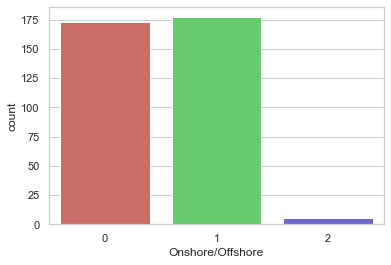

In [31]:
# визуализируем 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

y_data = pd.DataFrame(train_full['Onshore/Offshore'])

sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

Класс который представлен в меньшем количестве называется - **миноритарным**

Класс который представлен в большем количестве называется - **мажоритарным**

Восстановление баланса классов может проходить двумя путями. В первом случае удаляют некоторое количество примеров мажоритарного класса (**undersampling**), во втором – увеличивают количество примеров миноритарного (**oversampling**).

Для нашего случая undersampling не очень подходит, так как мы сильно снизим количество данных, что в свою очередь скажется сильно на качестве классификатора.

**Дублирование примеров миноритарного класса (Oversampling)**

Самый простой метод – это дублирование примеров миноритарного класса. В зависимости от того, какое соотношение классов необходимо, выбирается количество случайных записей для дублирования.

Такой подход к восстановлению баланса не всегда может оказаться самым эффективным, поэтому был предложен специальный метод увеличения числа примеров миноритарного класса – алгоритм ***SMOTE (Synthetic Minority Oversampling Technique)***.

**SMOTE** вводит синтетические примеры в сегментах линии для передискретизации миноритарных отсчетов класса. Она объединяет все классы k-миноритариев, которые находятся близко к соседям. Выбор соседей k ближайших соседей случайен. Число зависит от количества передискретизации, необходимого модели.

Эта стратегия основана на идее генерации некоторого количества искусственных примеров, которые были бы «похожи» на имеющиеся в миноритарном классе, но при этом не дублировали их.

Подробнее в документации:

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [33]:
from imblearn.over_sampling import SMOTE

# создадим модель SMOTE указав кол-во соседей 3 (больше нет смысла, у нас всего 5 экземпляров одного класса)
os = SMOTE(random_state=0, k_neighbors=3)

# вектор признаков
X_train_full = train_full.drop(['Onshore/Offshore'], axis=1) 
# вектор целевой переменной
y_train_full = train_full['Onshore/Offshore']

column = X_train_full.columns

print("До балансировки")
print(X_train_full.shape)
print(y_train_full.value_counts())

# Применим алгоритм балансировки
os_data_X, os_data_y = os.fit_resample(X_train_full, y_train_full)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Onshore/Offshore'])

print('_'*100)
print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

До балансировки
(355, 65)
1    177
0    173
2      5
Name: Onshore/Offshore, dtype: int64
____________________________________________________________________________________________________
После балансировки
(531, 65)
Onshore/Offshore
0                   177
1                   177
2                   177
dtype: int64


In [34]:
os_data_X.head()

,Lithology_DOLOMITE,Lithology_LIMESTONE,Structural setting_PASSIVE,regime_EROSION,Reservoir status_NEARLY DEPLETED,Lithology_THINLY-BEDDED SANDSTONE,regime_EVAPORITE,Lithology_CHALKY LIMESTONE,regime_GRAVITY,regime_COMPRESSION,...,Depth,Period_CRETACEOUS,regime_TRANSPRESSION,Period_DEVONIAN,Lithology_CONGLOMERATE,Lithology_SANDSTONE,Reservoir status_UNKNOWN,regime_STRIKE-SLIP,Hydrocarbon type_GAS-CONDENSATE,regime_INVERSION
0,0,0,0,0,0,0,0,0,0,1,...,15250.000000,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,16360.000000,0,0,0,0,1,0,0,1,1
2,1,0,0,1,0,0,0,0,0,1,...,4700.000000,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,1,...,8105.345849,1,0,0,0,1,0,0,0,1
4,0,0,0,1,1,0,0,0,0,1,...,7600.000000,1,0,0,0,1,0,0,0,0


## Масштабирование признаков

Мы видим что все признаки у нас имеют разный диапазон.

**Масштабированием** называется общий процесс изменения диапазона признака. Это необходимый шаг, потому что признаки измеряются в разных единицах, а значит покрывают разные диапазоны. Это сильно искажает результаты таких алгоритмов, как метод опорных векторов и метод k-ближайших соседей, которые учитывают расстояния между измерениями. А масштабирование позволяет этого избежать. 

Существуют методы которые устойчивы к разным диапозонам признаков, например, линейная регрессия и «случайный лес».

**Существуют два основных типа масштабирования данных:**
1. ***Нормализация*** относится к изменению масштаба числовых атрибутов в диапазоне от 0 до 1.

`from sklearn.preprocessing import MinMaxScaler`
2. ***Стандартизация*** - относится к сдвигу распределения каждого атрибута, чтобы иметь среднее значение нуля и стандартное отклонение единицы (дисперсия единицы).

`from sklearn.preprocessing import StandardScaler`

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#это тоже не делали и не обсуждали в прошлый раз!

# os_data_X_ - это вектор признаков (все сбалансировано и обработано)
# os_data_y - вектор ответов

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(os_data_X)
# Transform both the training and testing data
X_train_norm = scaler.transform(os_data_X)
print(X_train_norm)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
# Применим масштабирование к тестовым данным
test_full_norm = scaler.transform(test_full)

print(test_full_norm)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


# Построение модели

В качестве модели я выбрала метод опорных векторов, в том числе потому что он хорошо работает на разряженных данных.

Но в качестве продвинутого решения, модель должна выбираться из нескольких путем экспериментов.

In [37]:
# X_train_norm - это вектор признаков (все сбалансировано и обработано)
# os_data_y - вектор ответов

# test_full_norm - это вектор признаков для тестового набора данных

# Кроссвалидацию тоже не смотрели вообще до этого! (но для данной задачи она не сильно улучшает
# результат), с train_test_split выше оценки в среднем получаются

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
SVC_model = SVC() 
cvs = cross_val_score(estimator=SVC_model, X=X_train_norm, y=os_data_y, cv=kf, scoring='accuracy')

print(cvs)
print(cvs.mean())

SVC_model.fit(X_train_norm, os_data_y)

[0.91588785 0.93396226 0.90566038 0.91509434 0.97169811]
0.9284605889613824


C:\Users\kshch\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kshch\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kshch\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kshch\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

SVC()

**Дальше пример того как правильно сохранить ответы и скачать их для загрузки.**

In [38]:
y_pred = SVC_model.predict(test_full_norm)

In [39]:
y_pred_df = pd.DataFrame(y_pred, columns=['Onshore/Offshore'])
# 0 - OFFSHORE
# 1 - ONSHORE
# 2 - ONSHORE-OFFSHORE
d = {0: 'OFFSHORE', 1: 'ONSHORE', 2: 'ONSHORE-OFFSHORE'}
y_pred_df['Onshore/Offshore'] = y_pred_df['Onshore/Offshore'].map(d).fillna(y_pred_df['Onshore/Offshore'])
y_pred_df = pd.Series(y_pred_df['Onshore/Offshore'])
y_pred_df = y_pred_df.reset_index()
y_pred_df

,index,Onshore/Offshore
0,0,OFFSHORE
1,1,ONSHORE
2,2,OFFSHORE
3,3,ONSHORE
4,4,OFFSHORE
...,...,...
273,273,ONSHORE
274,274,OFFSHORE
275,275,ONSHORE
276,276,ONSHORE


In [40]:
y_pred_df.to_csv('Adelya_submit_v2.csv', index=False)
files.download("Adelya_submit_v2.csv")

# Еще перебор моделей

In [ ]:
!pip install catboost

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X_train_norm, os_data_y, test_size=0.3, random_state=1) 

catboost = CatBoostClassifier()
tree = DecisionTreeClassifier()
classifier = AdaBoostClassifier()
xgb = xgb.XGBClassifier()
randomtree = RandomForestClassifier()

models = [catboost, tree, classifier, xgb, randomtree]

accuracy = []
for model in models:
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test) 
 
    accuracy.append(accuracy_score(y_prediction, y_test)) 

In [ ]:
df = pd.DataFrame({'model': models, 'score': accuracy})
df

,model,score
0,<catboost.core.CatBoostClassifier object at 0x...,0.95000
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.92500
2,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.90625
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.95625
4,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.93750


In [ ]:
# Тут я пробовала грид серч+ но он час считал, дальше мне было лень
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_train_norm, os_data_y, test_size=0.3, random_state=1) 

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.